# Aula 01

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import numpy as np


In [2]:
fonte = "https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv?raw=true"

dados = pd.read_csv(fonte)
dadoshead = dados.head()

In [3]:
dados.shape

(127380, 136)

In [4]:
colunadados = dados.columns.values
colunadados

array(['NU_INSCRICAO', 'NU_ANO', 'CO_MUNICIPIO_RESIDENCIA',
       'NO_MUNICIPIO_RESIDENCIA', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA',
       'NU_IDADE', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA',
       'TP_NACIONALIDADE', 'CO_MUNICIPIO_NASCIMENTO',
       'NO_MUNICIPIO_NASCIMENTO', 'CO_UF_NASCIMENTO', 'SG_UF_NASCIMENTO',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO',
       'IN_TREINEIRO', 'CO_ESCOLA', 'CO_MUNICIPIO_ESC',
       'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ',
       'IN_DEFICIENCIA_AUDITIVA', 'IN_SURDO_CEGUEIRA',
       'IN_DEFICIENCIA_FISICA', 'IN_DEFICIENCIA_MENTAL',
       'IN_DEFICIT_ATENCAO', 'IN_DISLEXIA', 'IN_DISCALCULIA',
       'IN_AUTISMO', 'IN_VISAO_MONOCULAR', 'IN_OUTRA_DEF', 'IN_GESTANTE',
       'IN_LACTANTE', 'IN_IDOSO', 'IN_ESTUDA_CLASSE_HOSPITALAR',
       'IN_SEM_RECURSO', 'IN_BRAILLE', 'IN_AMPLIADA_24

In [5]:
dados["SG_UF_RESIDENCIA"]

0         PA
1         PA
2         PA
3         PA
4         PA
          ..
127375    MG
127376    BA
127377    BA
127378    BA
127379    MG
Name: SG_UF_RESIDENCIA, Length: 127380, dtype: object

In [6]:
dados["SG_UF_RESIDENCIA"].unique()

array(['PA', 'RO', 'MT', 'AC', 'AM', 'RR', 'MA', 'PR', 'BA', 'PI', 'CE',
       'PE', 'AP', 'TO', 'SC', 'GO', 'MG', 'SP', 'SE', 'RJ', 'PB', 'AL',
       'RN', 'ES', 'DF', 'RS', 'MS'], dtype=object)

In [7]:
len(dados["SG_UF_RESIDENCIA"].unique())

27

In [8]:
dados["SG_UF_RESIDENCIA"].value_counts()

SP    20264
MG    13547
BA    10040
RJ     8467
CE     7381
PA     7170
PE     6941
MA     5543
RS     5466
PR     5259
GO     4268
PB     3690
PI     3034
RN     2959
AM     2820
SC     2673
ES     2550
DF     2408
AL     2263
MT     2230
SE     1815
MS     1655
RO     1400
TO     1178
AP     1047
AC      946
RR      366
Name: SG_UF_RESIDENCIA, dtype: int64

In [9]:
dados["NU_IDADE"].value_counts()

18    21452
17    21256
19    14418
20    10413
16     7830
      ...  
75        2
73        2
82        1
77        1
76        1
Name: NU_IDADE, Length: 65, dtype: int64

# Desafio 01 - Proporçao dos inscritos por idade

In [10]:
def f(x = 18):
    total = dados["NU_IDADE"].value_counts().sum()
    dados_por_idade = dados["NU_IDADE"].value_counts()
    percentual_por_idade = dados_por_idade*100/total
    print(percentual_por_idade.loc[percentual_por_idade.index == x])
interact(f,x=widgets.IntSlider(min=13, max=100, step=1, value=18))

interactive(children=(IntSlider(value=18, description='x', min=13), Output()), _dom_classes=('widget-interact'…

<function __main__.f(x=18)>

# Desafio 02 - Descobrir de quais estados sao os inscritos com 13 anos

In [11]:
dados[["NU_IDADE","SG_UF_RESIDENCIA"]].loc[dados["NU_IDADE"] == 13]

,NU_IDADE,SG_UF_RESIDENCIA
57359,13,SP
95630,13,MT
98197,13,AP
116501,13,BA


# Desafio 03 - Colocar titulo no gráfico


Text(0, 0.5, 'QTD de pessoas')

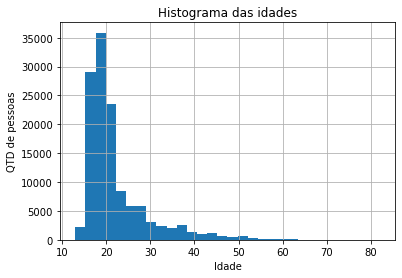

In [12]:
dados["NU_IDADE"].hist(bins = 30)
plt.title("Histograma das idades")
plt.xlabel("Idade")
plt.ylabel("QTD de pessoas")

# Desafio 04 - Plotar os Histogramas das idades dos treineiros e dos nao treineiros

Text(0.5, 1.0, 'Grafico dos não trainees')

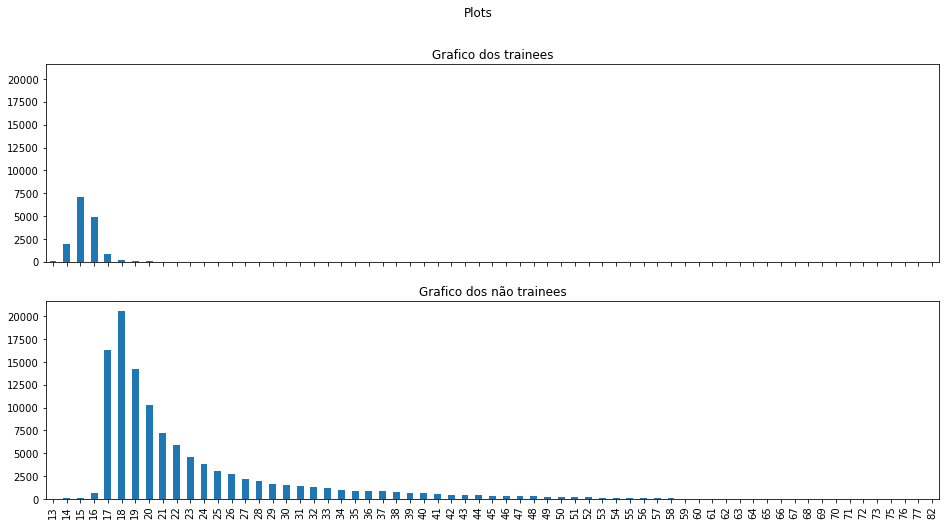

In [13]:
fig,axs = plt.subplots(2,figsize = (16,8),sharex=True,sharey=True)
fig.suptitle('Plots')
dados.query("IN_TREINEIRO == 1")["NU_IDADE"].value_counts().sort_index().plot(kind = "bar",ax = axs[0])
dados.query("IN_TREINEIRO != 1")["NU_IDADE"].value_counts().sort_index().plot(kind = "bar",ax = axs[1])
axs[0].set_title('Grafico dos trainees')
axs[1].set_title('Grafico dos não trainees')


In [14]:
prova = ["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_MT","NU_NOTA_LC","NU_NOTA_REDACAO"]

dados[prova].describe()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_REDACAO
count,92758.000000,98043.000000,92758.000000,98043.000000,98043.000000
mean,477.964015,507.365912,523.555206,520.463928,571.570025
std,76.296099,82.972839,109.416939,64.556578,188.076455
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,418.000000,447.900000,435.300000,483.700000,480.000000
50%,470.200000,510.900000,501.600000,526.100000,580.000000
75%,533.300000,567.100000,598.200000,565.100000,680.000000
max,797.300000,809.400000,985.000000,801.700000,1000.000000


In [15]:
dados[prova].quantile(0.8)

NU_NOTA_CN         547.5
NU_NOTA_CH         579.4
NU_NOTA_MT         621.8
NU_NOTA_LC         574.2
NU_NOTA_REDACAO    720.0
Name: 0.8, dtype: float64

<AxesSubplot:>

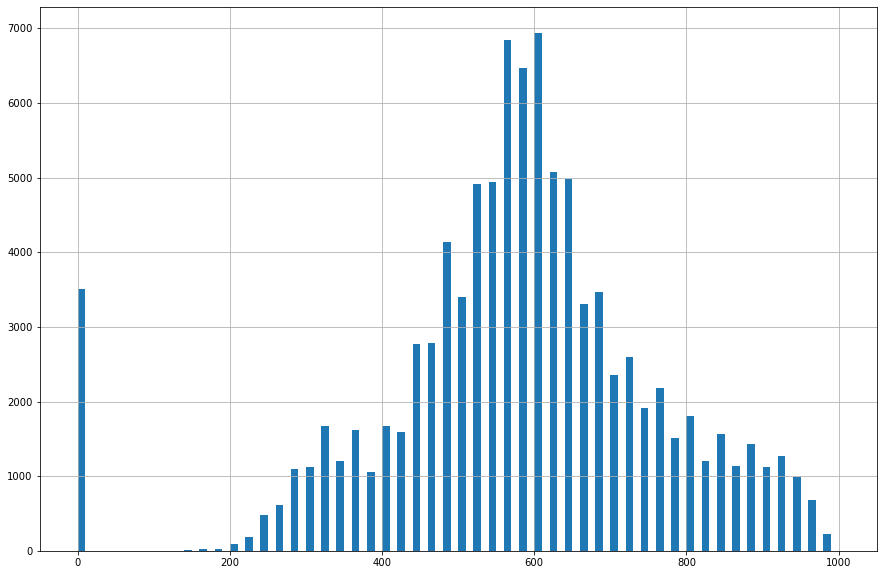

In [16]:
dados["NU_NOTA_REDACAO"].hist(bins = 100,figsize=(15,10))

In [17]:
dados.query("TP_LINGUA == 1")

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,...,A,A,A,A,B,A,C,A,B,B
1,190001004674,2019,1504208,Marabá,15,PA,23,M,1,3,...,A,A,A,B,A,A,B,A,A,B
2,190001004722,2019,1501402,Belém,15,PA,35,F,2,1,...,A,A,A,B,A,B,B,A,A,B
3,190001004735,2019,1507300,São Félix do Xingu,15,PA,23,F,1,3,...,A,A,A,B,A,A,B,A,A,B
5,190001004841,2019,1503606,Itaituba,15,PA,18,F,1,3,...,B,A,A,B,A,A,D,A,B,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127372,190006119915,2019,2611606,Recife,26,PE,44,F,1,1,...,A,A,A,B,A,A,B,A,A,A
127374,190006119995,2019,2927408,Salvador,29,BA,26,F,2,2,...,B,A,A,B,A,A,C,A,B,B
127375,190006120035,2019,3142700,Montalvânia,31,MG,17,F,1,1,...,A,A,A,B,A,A,D,A,B,B
127377,190006120037,2019,2927408,Salvador,29,BA,22,F,1,3,...,A,A,A,A,A,A,B,A,A,B


# Aula02

## Desafio do Gui bonzinho - aumentar a amostra para alunos menores de idade e compara a proporçao por estado

In [18]:
def desafioDoGui(Menores_que,Iguais_a):    
    fig,axs = plt.subplots(1,2,figsize=(15,3),sharex=False,sharey=False)
    plt.tight_layout(pad = 2)
    dados.query(f"NU_IDADE <= {Menores_que}")["SG_UF_RESIDENCIA"].value_counts(normalize = True).sort_index().plot.bar(ax = axs[0])
    dados.query(f"NU_IDADE == {Iguais_a}")["SG_UF_RESIDENCIA"].value_counts(normalize = True).sort_index().plot.bar(ax = axs[1])
    axs[0].set_title(f'Grafico das idades menores ou iguais aos {Menores_que} anos')
    axs[1].set_title(f'Grafico igual a {Iguais_a} anos')
interact(desafioDoGui,Menores_que=widgets.IntSlider(min=13, max=100, step=1, value=18,),Iguais_a=widgets.IntSlider(min=13, max=100, step=1, value=18))

interactive(children=(IntSlider(value=18, description='Menores_que', min=13), IntSlider(value=18, description=…

<function __main__.desafioDoGui(Menores_que, Iguais_a)>

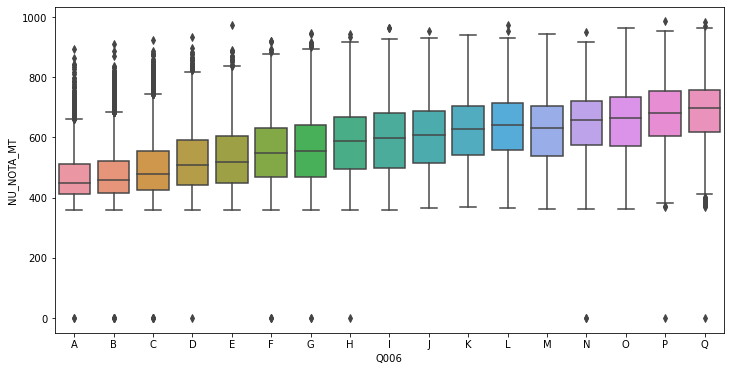

In [19]:
listaOrdenaRenda = dados["Q006"].unique()
listaOrdenaRenda.sort()
plt.figure(figsize=(12,6))
sns.boxplot(x = 'Q006', y='NU_NOTA_MT',data = dados,order=listaOrdenaRenda)
plt.show()

<AxesSubplot:xlabel='TP_COR_RACA', ylabel='NU_NOTA_REDACAO'>

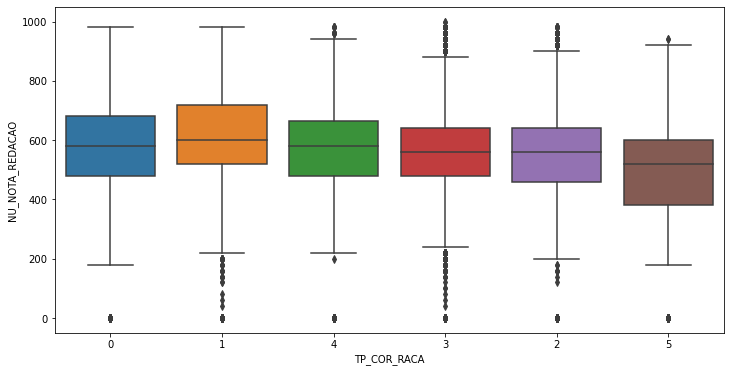

In [20]:
listaOrdenaRaca = [0,1,4,3,2,5] # Ordem: nao declarados, branco, amarelo, pardo, preto, indigena
plt.figure(figsize=(12,6))
sns.boxplot(x = 'TP_COR_RACA', y='NU_NOTA_REDACAO',data = dados,order=listaOrdenaRaca)

In [21]:
prova = ["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_MT","NU_NOTA_LC","NU_NOTA_REDACAO"]
dados[prova].describe()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_REDACAO
count,92758.000000,98043.000000,92758.000000,98043.000000,98043.000000
mean,477.964015,507.365912,523.555206,520.463928,571.570025
std,76.296099,82.972839,109.416939,64.556578,188.076455
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,418.000000,447.900000,435.300000,483.700000,480.000000
50%,470.200000,510.900000,501.600000,526.100000,580.000000
75%,533.300000,567.100000,598.200000,565.100000,680.000000
max,797.300000,809.400000,985.000000,801.700000,1000.000000


count    127380.000000
mean        392.069212
std         231.301900
min           0.000000
25%         277.790000
50%         477.090000
75%         550.825000
max         832.820000
dtype: float64

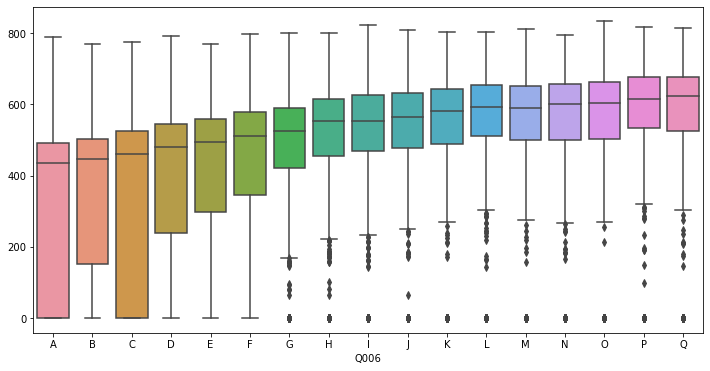

In [22]:
media_notas_indiv = dados[prova].sum(axis=1)/len(prova)
dados['NU_NOTA_TOTAL'] = media_notas_indiv

plt.figure(figsize=(12,6))
sns.boxplot(x = 'Q006', y=media_notas_indiv,data = dados,order=listaOrdenaRenda)
media_notas_indiv.describe()

## Desafio 3 - criar uma funçao de plotagem

In [23]:
def plotagem(grupos,medida,organiza = None,dados = dados,eixo = None): # Recebe: grupos (lsita/serie, contendo categorizaçao de algum valor), medida (valores a serem medidos), organiza (lista para ordenar a plotagem de acordo com os grupos)
    return sns.boxplot(x = grupos, y = medida, data = dados, order = organiza, ax = eixo)

In [24]:
prova.append('NU_NOTA_TOTAL')

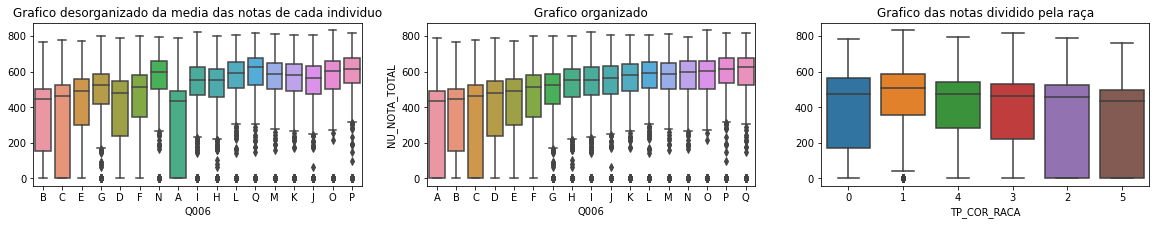

In [25]:
plt.figure(figsize=(20,3))

plt.subplot(131,title = 'Grafico desorganizado da media das notas de cada individuo')
plotagem('Q006', media_notas_indiv)
plt.subplot(132, title = 'Grafico organizado')
plotagem('Q006', 'NU_NOTA_TOTAL',organiza=listaOrdenaRenda)
plt.subplot(133, title='Grafico das notas dividido pela raça')
plotagem('TP_COR_RACA', media_notas_indiv,organiza = listaOrdenaRaca)
plt.show()

C:\Users\henri\Miniconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='NU_NOTA_TOTAL', ylabel='Density'>

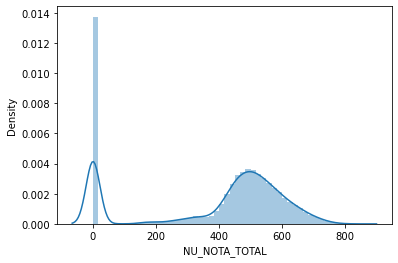

In [26]:
sns.distplot(dados['NU_NOTA_TOTAL'])

In [27]:
presenca = ['TP_PRESENCA_LC','TP_PRESENCA_MT']
prova = ['NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT','NU_NOTA_CN','NU_NOTA_REDACAO','NU_NOTA_TOTAL']

## Desafio 5 - verificar se quem é eliminado tira nota 0 ou é NAN

In [28]:
eliminados_ou_ausentes_notaZero = dados.query(f"({presenca[0]} == 2 | {presenca[1]} == 2)")
eliminados_ou_ausentes_notaZero = eliminados_ou_ausentes_notaZero[['NU_NOTA_MT', "NU_NOTA_LC",presenca[1],presenca[0]]]
eliminados_ou_ausentes_notaZero

,NU_NOTA_MT,NU_NOTA_LC,TP_PRESENCA_MT,TP_PRESENCA_LC
77,NaN,NaN,0,2
396,NaN,NaN,0,2
446,NaN,NaN,0,2
609,NaN,NaN,0,2
728,NaN,NaN,0,2
...,...,...,...,...
125216,NaN,NaN,0,2
125503,NaN,476.8,2,1
125784,NaN,NaN,0,2
126769,NaN,NaN,0,2


<AxesSubplot:title={'center':'Grafico dos nao treineiros'}, xlabel='Q006', ylabel='Count'>

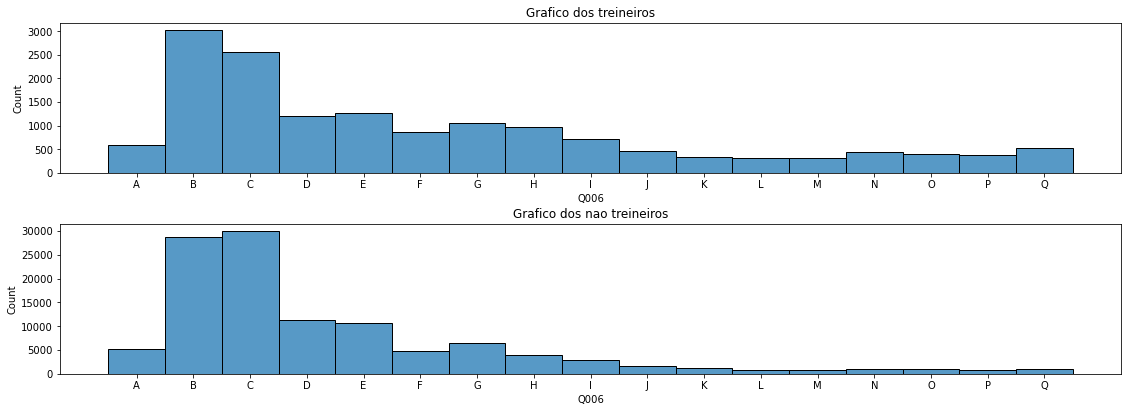

In [29]:
treineiros = dados.query("IN_TREINEIRO == 1")
nao_treineiros = dados.query('IN_TREINEIRO != 1')

figure,(ax1,ax2) = plt.subplots(2,1,sharey =False,figsize = (16,6))
figure.tight_layout(pad = 3)
ax1.set_title('Grafico dos treineiros')
ax2.set_title('Grafico dos nao treineiros')
sns.histplot(treineiros,x=treineiros.sort_values("Q006")["Q006"],ax = ax1)
sns.histplot(nao_treineiros,x = nao_treineiros.sort_values("Q006")["Q006"],ax = ax2)

(28587, 98793)

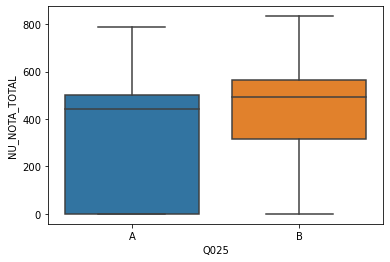

In [30]:
plotagem('Q025','NU_NOTA_TOTAL',organiza=['A','B'])
len(dados.query('Q025 == "A"')),len(dados.query('Q025 == "B"'))

(20969, 77249)

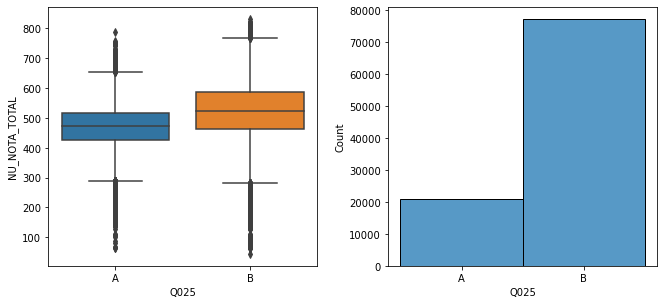

In [31]:
dados_sem_nota_0 = dados.query('NU_NOTA_TOTAL != 0')
fig,(ax1,ax2) = plt.subplots(1,2,figsize = (10,5))
fig.tight_layout(pad = 4)
plotagem('Q025','NU_NOTA_TOTAL',organiza=['A','B'],dados = dados_sem_nota_0,eixo=ax1)
sns.histplot(data = dados_sem_nota_0,x= dados_sem_nota_0.sort_values('Q025')['Q025'],ax = ax2)
len(dados_sem_nota_0.query('Q025 == "A"')),len(dados_sem_nota_0.query('Q025 == "B"'))

# Aula 03

<AxesSubplot:xlabel='NU_NOTA_TOTAL', ylabel='Count'>

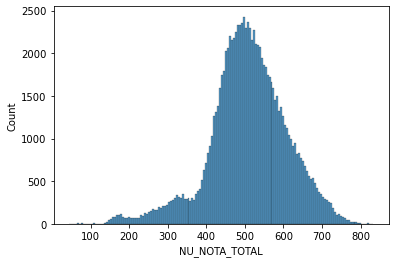

In [32]:
sns.histplot(dados_sem_nota_0,x='NU_NOTA_TOTAL')

## Desafio 01 - plotar mediana media e moda

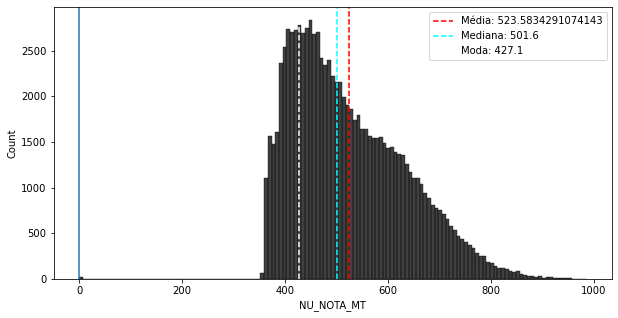

In [33]:
media = dados_sem_nota_0['NU_NOTA_MT'].mean()
mediana = dados_sem_nota_0['NU_NOTA_MT'].sort_values().quantile(0.5)
moda = dados_sem_nota_0['NU_NOTA_MT'].mode()[0]
plt.figure(figsize=(10,5))
sns.histplot(dados_sem_nota_0,x='NU_NOTA_MT',color='black')
plt.axvline(media,color = 'red', linestyle = 'dashed',label = f'Média: {media}')
plt.axvline(mediana,color = 'cyan', linestyle = 'dashed',label = f'Mediana: {mediana}')
plt.axvline(moda,color = 'white', linestyle = 'dashed',label = f'Moda: {moda}')
plt.axvline()
plt.legend()

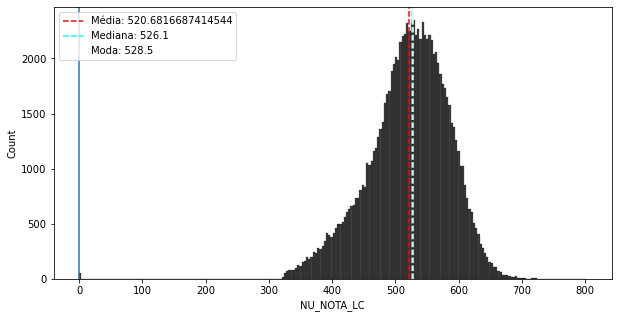

In [34]:
media = dados_sem_nota_0['NU_NOTA_LC'].mean()
mediana = dados_sem_nota_0['NU_NOTA_LC'].sort_values().quantile(0.5)
moda = dados_sem_nota_0['NU_NOTA_LC'].mode()[0]
plt.figure(figsize=(10,5))
sns.histplot(dados_sem_nota_0,x='NU_NOTA_LC',color = 'k') 
plt.axvline(media,color = 'red', linestyle = 'dashed',label = f'Média: {media}')
plt.axvline(mediana,color = 'cyan', linestyle = 'dashed',label = f'Mediana: {mediana}')
plt.axvline(moda,color = 'white', linestyle = 'dashed',label = f'Moda: {moda}')
plt.axvline()
plt.legend()

<AxesSubplot:xlabel='Q025', ylabel='NU_NOTA_TOTAL'>

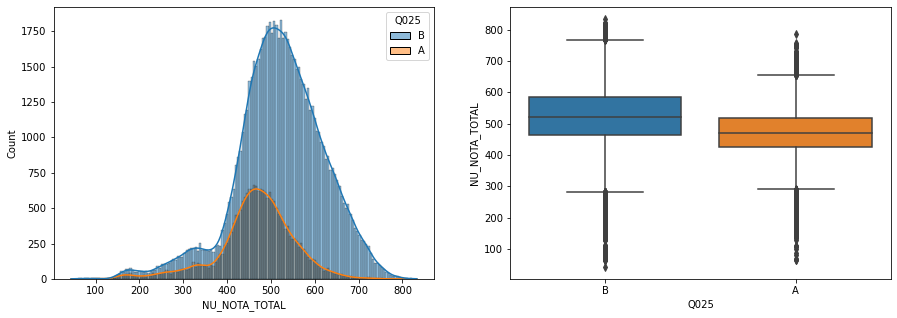

In [35]:
fig,axs = plt.subplots(1,2,figsize=(15,5))
sns.histplot(dados_sem_nota_0,x='NU_NOTA_TOTAL',hue='Q025',kde=True,ax = axs[0])
plotagem(grupos='Q025',medida= 'NU_NOTA_TOTAL',dados = dados_sem_nota_0,eixo = axs[1])

<AxesSubplot:xlabel='NU_NOTA_TOTAL', ylabel='Density'>

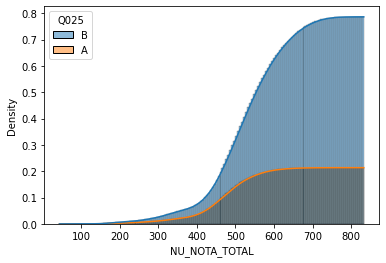

In [36]:
sns.histplot(dados_sem_nota_0,x='NU_NOTA_TOTAL',hue='Q025',kde=True,stat = 'density',cumulative = True)

(-50.0, 1050.0)

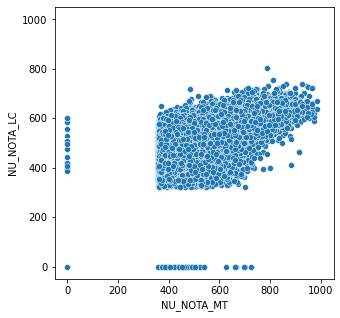

In [37]:
plt.figure(figsize=(5,5))
sns.scatterplot(data = dados_sem_nota_0,x='NU_NOTA_MT', y='NU_NOTA_LC')
plt.xlim((-50,1050))
plt.ylim((-50,1050))

In [38]:
correlacao = dados_sem_nota_0[prova].corr()
correlacao

,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_CN,NU_NOTA_REDACAO,NU_NOTA_TOTAL
NU_NOTA_CH,1.000000,0.744170,0.610332,0.668979,0.528338,0.735534
NU_NOTA_LC,0.744170,1.000000,0.587710,0.641624,0.535797,0.711686
NU_NOTA_MT,0.610332,0.587710,1.000000,0.649527,0.493046,0.790051
NU_NOTA_CN,0.668979,0.641624,0.649527,1.000000,0.504740,0.785600
NU_NOTA_REDACAO,0.528338,0.535797,0.493046,0.504740,1.000000,0.783647
NU_NOTA_TOTAL,0.735534,0.711686,0.790051,0.785600,0.783647,1.000000


<AxesSubplot:>

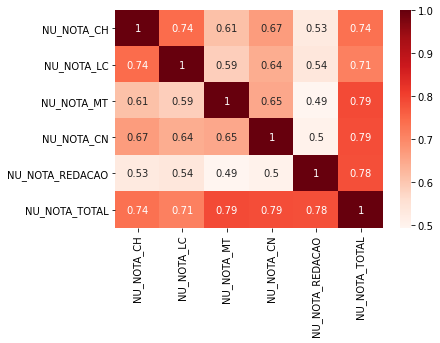

In [39]:
sns.heatmap(correlacao,cmap='Reds',annot=True)

In [40]:
import dask.dataframe as dd
df = dd.read_csv('D:/Data/microdados_enem_2019/DADOS/MICRODADOS_ENEM_2019.csv',encoding = "ISO-8859-1", sep=";")
enem_uberlandia = df.query('NO_MUNICIPIO_RESIDENCIA == "Uberlândia"').compute()

## Desafio 02 - remover da diagonal pra cima

<AxesSubplot:>

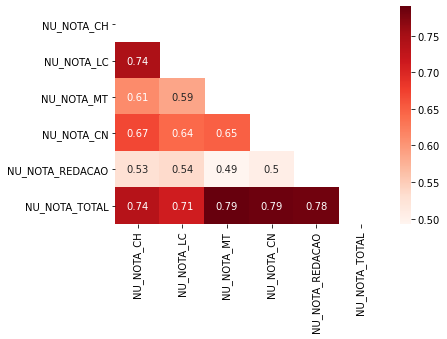

In [41]:
mask = np.zeros_like(correlacao)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(correlacao,cmap='Reds',annot=True,mask=mask)

## Desafio 03 - Comparar a amostra com 

In [42]:
prova = ['NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT','NU_NOTA_CN','NU_NOTA_REDACAO']
enem_uberlandia['NU_NOTA_TOTAL'] = enem_uberlandia[prova].sum(axis = 1)/len(prova)
prova.append('NU_NOTA_TOTAL')
enem_uberlandia[prova].corr()

,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_CN,NU_NOTA_REDACAO,NU_NOTA_TOTAL
NU_NOTA_CH,1.000000,0.761899,0.645089,0.710856,0.585989,0.765031
NU_NOTA_LC,0.761899,1.000000,0.615626,0.671801,0.574040,0.731868
NU_NOTA_MT,0.645089,0.615626,1.000000,0.692119,0.580910,0.825305
NU_NOTA_CN,0.710856,0.671801,0.692119,1.000000,0.586776,0.823700
NU_NOTA_REDACAO,0.585989,0.574040,0.580910,0.586776,1.000000,0.823027
NU_NOTA_TOTAL,0.765031,0.731868,0.825305,0.823700,0.823027,1.000000


In [43]:
enem_uberlandia[prova].corr()

,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_CN,NU_NOTA_REDACAO,NU_NOTA_TOTAL
NU_NOTA_CH,1.000000,0.761899,0.645089,0.710856,0.585989,0.765031
NU_NOTA_LC,0.761899,1.000000,0.615626,0.671801,0.574040,0.731868
NU_NOTA_MT,0.645089,0.615626,1.000000,0.692119,0.580910,0.825305
NU_NOTA_CN,0.710856,0.671801,0.692119,1.000000,0.586776,0.823700
NU_NOTA_REDACAO,0.585989,0.574040,0.580910,0.586776,1.000000,0.823027
NU_NOTA_TOTAL,0.765031,0.731868,0.825305,0.823700,0.823027,1.000000


Text(0.5, 1.0, 'Grafico Amostra')

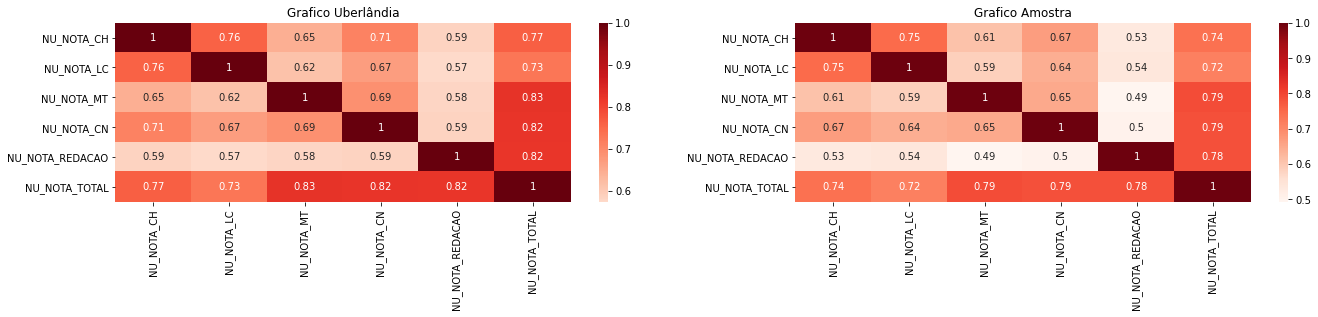

In [44]:
from matplotlib.axes import Axes
correl_udi = enem_uberlandia[prova].corr()
fig, axs = plt.subplots(1,2,figsize = (20,5))
plt.tight_layout(pad = 8)
sns.heatmap(correl_udi,cmap = 'Reds',ax = axs[0],annot = True,center = 0.75)
sns.heatmap(dados[prova].corr(),cmap = 'Reds',ax = axs[1],annot = True,center = 0.75)
Axes.set_title(axs[0],'Grafico Uberlândia')
Axes.set_title(axs[1],'Grafico Amostra')

# Aula 04

In [45]:
provas_entrada = ['NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_CN','NU_NOTA_REDACAO']
prova_saida = ['NU_NOTA_MT']
dados_sem_nota_0 = dados_sem_nota_0[prova].dropna()
notas_entrada = dados_sem_nota_0[provas_entrada]
notas_saida = dados_sem_nota_0[prova_saida]

In [46]:
x = notas_entrada
y = notas_saida

In [47]:
from sklearn.model_selection import train_test_split

seed = 54321
x_treino,x_teste, y_treino, y_teste =  train_test_split(x,y,test_size = 0.25,random_state = seed)

In [48]:
from sklearn.svm import LinearSVR

modelo = LinearSVR(random_state=seed)
modelo.fit(x_treino,y_treino)

C:\Users\henri\Miniconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\henri\Miniconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVR(random_state=54321)

In [49]:
predicoes_mat = modelo.predict(x_teste)

<AxesSubplot:ylabel='NU_NOTA_MT'>

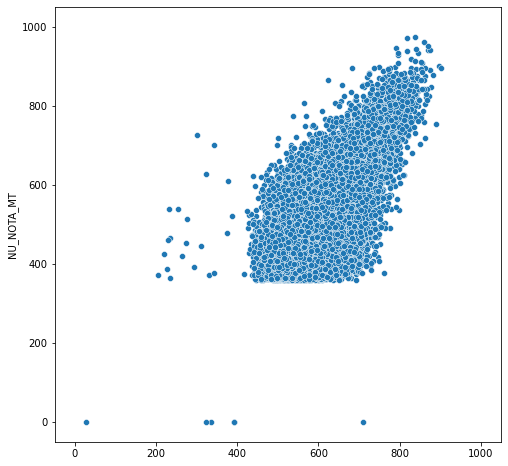

In [50]:
plt.figure(figsize=(8,8))
plt.xlim((-50,1050))
plt.ylim((-50,1050))
sns.scatterplot(x = predicoes_mat, y = y_teste['NU_NOTA_MT'])

## Desafio - Analise estatistica simples (media,mediana) vs modelo SVR

<AxesSubplot:title={'center':'Grafico da mediana'}, ylabel='NU_NOTA_MT'>

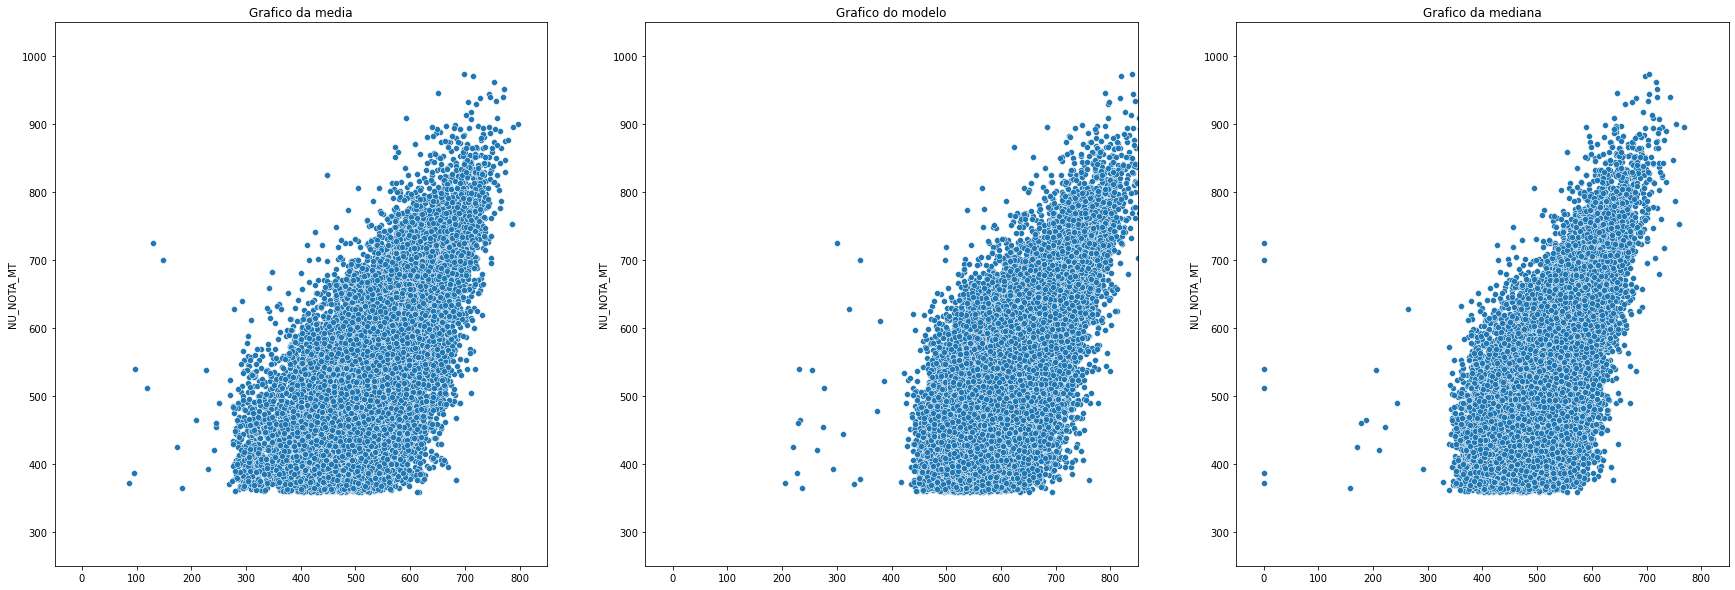

In [51]:
fig,axs = plt.subplots(1,3,figsize = (30,10))
limitex = (-50,850)
limitey = (250,1050)
axs[0].set_xlim(limitex)
axs[2].set_xlim(limitex)
axs[0].set_ylim(limitey)
axs[2].set_ylim(limitey)
axs[0].set_title('Grafico da media')
axs[2].set_title('Grafico da mediana')
axs[1].set_xlim(limitex)
axs[1].set_ylim(limitey)
axs[1].set_title('Grafico do modelo')
sns.scatterplot(x = x_teste.mean(axis=1), y = y_teste['NU_NOTA_MT'],ax = axs[0])
sns.scatterplot(x = predicoes_mat, y = y_teste['NU_NOTA_MT'],ax = axs[1])
sns.scatterplot(x = x_teste.median(axis=1), y = y_teste['NU_NOTA_MT'],ax = axs[2])

In [52]:
resultados = pd.DataFrame()
resultados['Real'] = y_teste['NU_NOTA_MT']
resultados['Previsao']= predicoes_mat
resultados['diferenca'] = resultados['Real'] - resultados['Previsao']
resultados['quadrado_diferenca'] = resultados['diferenca']**2
resultados

,Real,Previsao,diferenca,quadrado_diferenca
3181,519.4,625.849169,-106.449169,11331.425683
86122,458.9,521.175269,-62.275269,3878.209142
117697,399.5,507.856843,-108.356843,11741.205406
95155,554.2,669.023050,-114.823050,13184.332878
15292,574.8,634.461263,-59.661263,3559.466268
...,...,...,...,...
2704,424.0,555.412212,-131.412212,17269.169356
106968,367.8,591.164949,-223.364949,49891.900236
36314,645.1,668.224289,-23.124289,534.732757
19934,690.5,714.355341,-23.855341,569.077280


In [53]:
from sklearn.dummy import DummyRegressor
modelo_dummy = DummyRegressor()
modelo_dummy.fit(x_treino,y_treino)
dummy_predicoes = modelo_dummy.predict(x_teste)

In [54]:
from sklearn.metrics import mean_squared_error


mean_squared_error(y_teste,predicoes_mat),mean_squared_error(y_teste,dummy_predicoes)

(13275.415395235777, 11962.91196737901)

In [55]:
resultados['quadrado_diferenca'].mean()

13275.415395235777

# Aula 05 

In [56]:
from sklearn.svm import LinearSVR

modelo = LinearSVR(random_state=seed)
modelo.fit(x_treino,y_treino)
predicoes_mat = modelo.predict(x_teste)
mean_squared_error(y_teste,predicoes_mat)

C:\Users\henri\Miniconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\henri\Miniconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


13275.415395235777

In [57]:
from sklearn.tree import DecisionTreeRegressor
x_treino,x_teste,y_treino,y_teste = train_test_split(x,y,test_size = 0.25)
modelo_arvore = DecisionTreeRegressor(max_depth=3)
modelo_arvore.fit(x_treino,y_treino)
predicoes_mat_arvore = modelo_arvore.predict(x_teste)
mean_squared_error(y_teste,predicoes_mat_arvore)

5993.015331254704

In [58]:
from sklearn.model_selection import cross_validate

modelo_arvore = DecisionTreeRegressor(max_depth=3)
resultado_cross = cross_validate(modelo_arvore, x,y,cv = 10, scoring ='neg_mean_squared_error')
media_cross = (resultado_cross['test_score']*-1).mean()
desvio_padrao = (resultado_cross['test_score']*-1).std()
lim_inferior = media - (2*desvio_padrao)
lim_superior = media + (2*desvio_padrao)
print(f'intervalo de confiança {lim_inferior} - {lim_superior}')

intervalo de confiança -9.639444176899588 - 1051.0027816598083


In [59]:
def calcula_mse(resultado_cross):
    media_cross = (resultado_cross['test_score']*-1).mean()
    desvio_padrao = (resultado_cross['test_score']*-1).std()
    lim_inferior = media_cross - (2*desvio_padrao)
    lim_superior = media_cross + (2*desvio_padrao)
    print(f'intervalo de confiança {lim_inferior} - {lim_superior}')

In [60]:
from sklearn.model_selection import KFold
np.random.seed(seed)

partes = KFold(n_splits = 10,shuffle = True)
modelo_arvore = DecisionTreeRegressor(max_depth=5)
resultado_cross = cross_validate(modelo_arvore, x,y,cv = partes, scoring ='neg_mean_squared_error')
calcula_mse(resultado_cross)

intervalo de confiança 5526.970940056108 - 5832.236671762666


In [61]:
def regressor_arvore(nivel):   
    np.random.seed(seed)
    partes = KFold(n_splits = 10,shuffle = True)
    modelo_arvore = DecisionTreeRegressor(max_depth=nivel)
    resultado_cross = cross_validate(modelo_arvore, x,y,cv = partes, scoring ='neg_mean_squared_error')
    print(f'Teste = {(resultado_cross["test_score"]*-1).mean()}')

#for i in range(21):
    #regressor_arvore(i)

## Desafio 02 - Testar com outros parâmetros da árvore de decisão
## Desafio 03 - Como realizar ajustes de parâmetros com Sklearn
## Desafio 05 Plotar um gráfico com test_score e train_test